In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


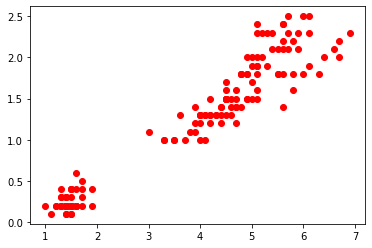

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],color='red')

In [14]:
sse = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.477123363965468,
 13.916908757908757,
 11.040239971910452,
 9.267073749921577,
 7.615402244955953,
 6.63426303286086,
 5.7392481962481945,
 5.170331036610448,
 4.638521543815662,
 4.385435463229582,
 3.968035087719297]

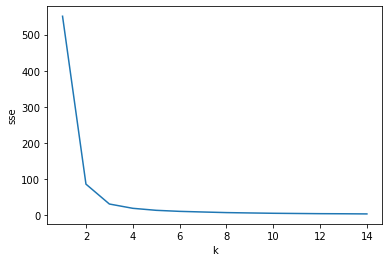

In [15]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(range(1,15),sse)

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['predicted'] = y_predicted
df.head()

,petal length (cm),petal width (cm),predicted
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2


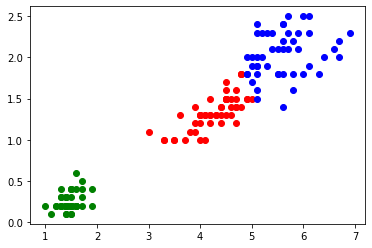

In [18]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df.head()

,petal length (cm),petal width (cm),predicted
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


In [23]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['predicted'] = y_predicted
df.head()

,petal length (cm),petal width (cm),predicted
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


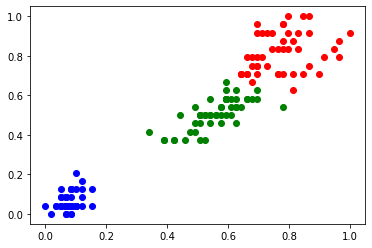

In [24]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')